In [104]:
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Data Processing

(array([  19.,    9.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1550., 4536.]),
 array([-9.        , -8.26666667, -7.53333333, -6.8       , -6.06666667,
        -5.33333333, -4.6       , -3.86666667, -3.13333333, -2.4       ,
        -1.66666667, -0.93333333, -0.2       ,  0.53333333,  1.26666667,
         2.        ]),
 <BarContainer object of 15 artists>)

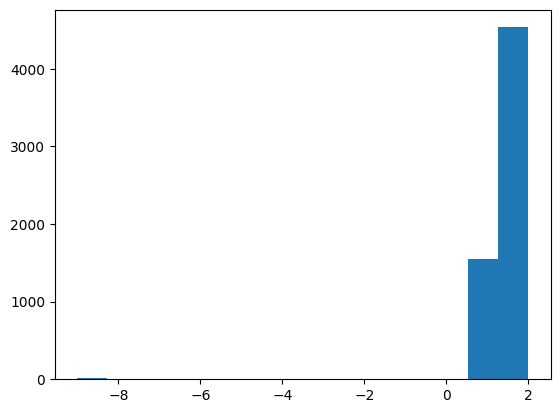

In [7]:
plt.hist(df["V201114"], bins=15)

In [89]:
df = pd.read_csv("./outputs/pos_filtered_df.csv")

y_data = df["V202073"].astype(int).to_numpy()
df = df.drop(["V202073"], axis=1)
Y = np.where(y_data == 2, 0, y_data)

X = df.to_numpy()

X_test, X_train, Y_test, Y_train = train_test_split(X, Y, train_size=0.3)
Y_train.shape, Y_test.shape

((4280,), (1834,))

In [90]:
X_test.shape

(1834, 67)

(array([ 740.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

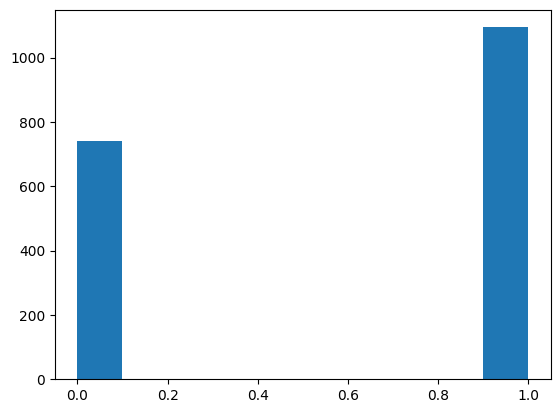

In [91]:
plt.hist(Y_test)

# Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [4]:
clf = LinearRegression()
clf.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = clf.predict(X_test)

y_pred = np.where(y_pred < 0.5, 0, 1)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       767
           1       0.94      0.94      0.94      1067

    accuracy                           0.93      1834
   macro avg       0.93      0.93      0.93      1834
weighted avg       0.93      0.93      0.93      1834



In [15]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
y_pred = clf.predict(X_test)

y_pred = np.where(y_pred < 0.5, 0, 1)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       767
           1       0.95      0.94      0.94      1067

    accuracy                           0.93      1834
   macro avg       0.93      0.93      0.93      1834
weighted avg       0.93      0.93      0.93      1834



# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [77]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       767
           1       0.92      0.92      0.92      1067

    accuracy                           0.91      1834
   macro avg       0.91      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834



In [79]:
df.columns[38]

'V201346'

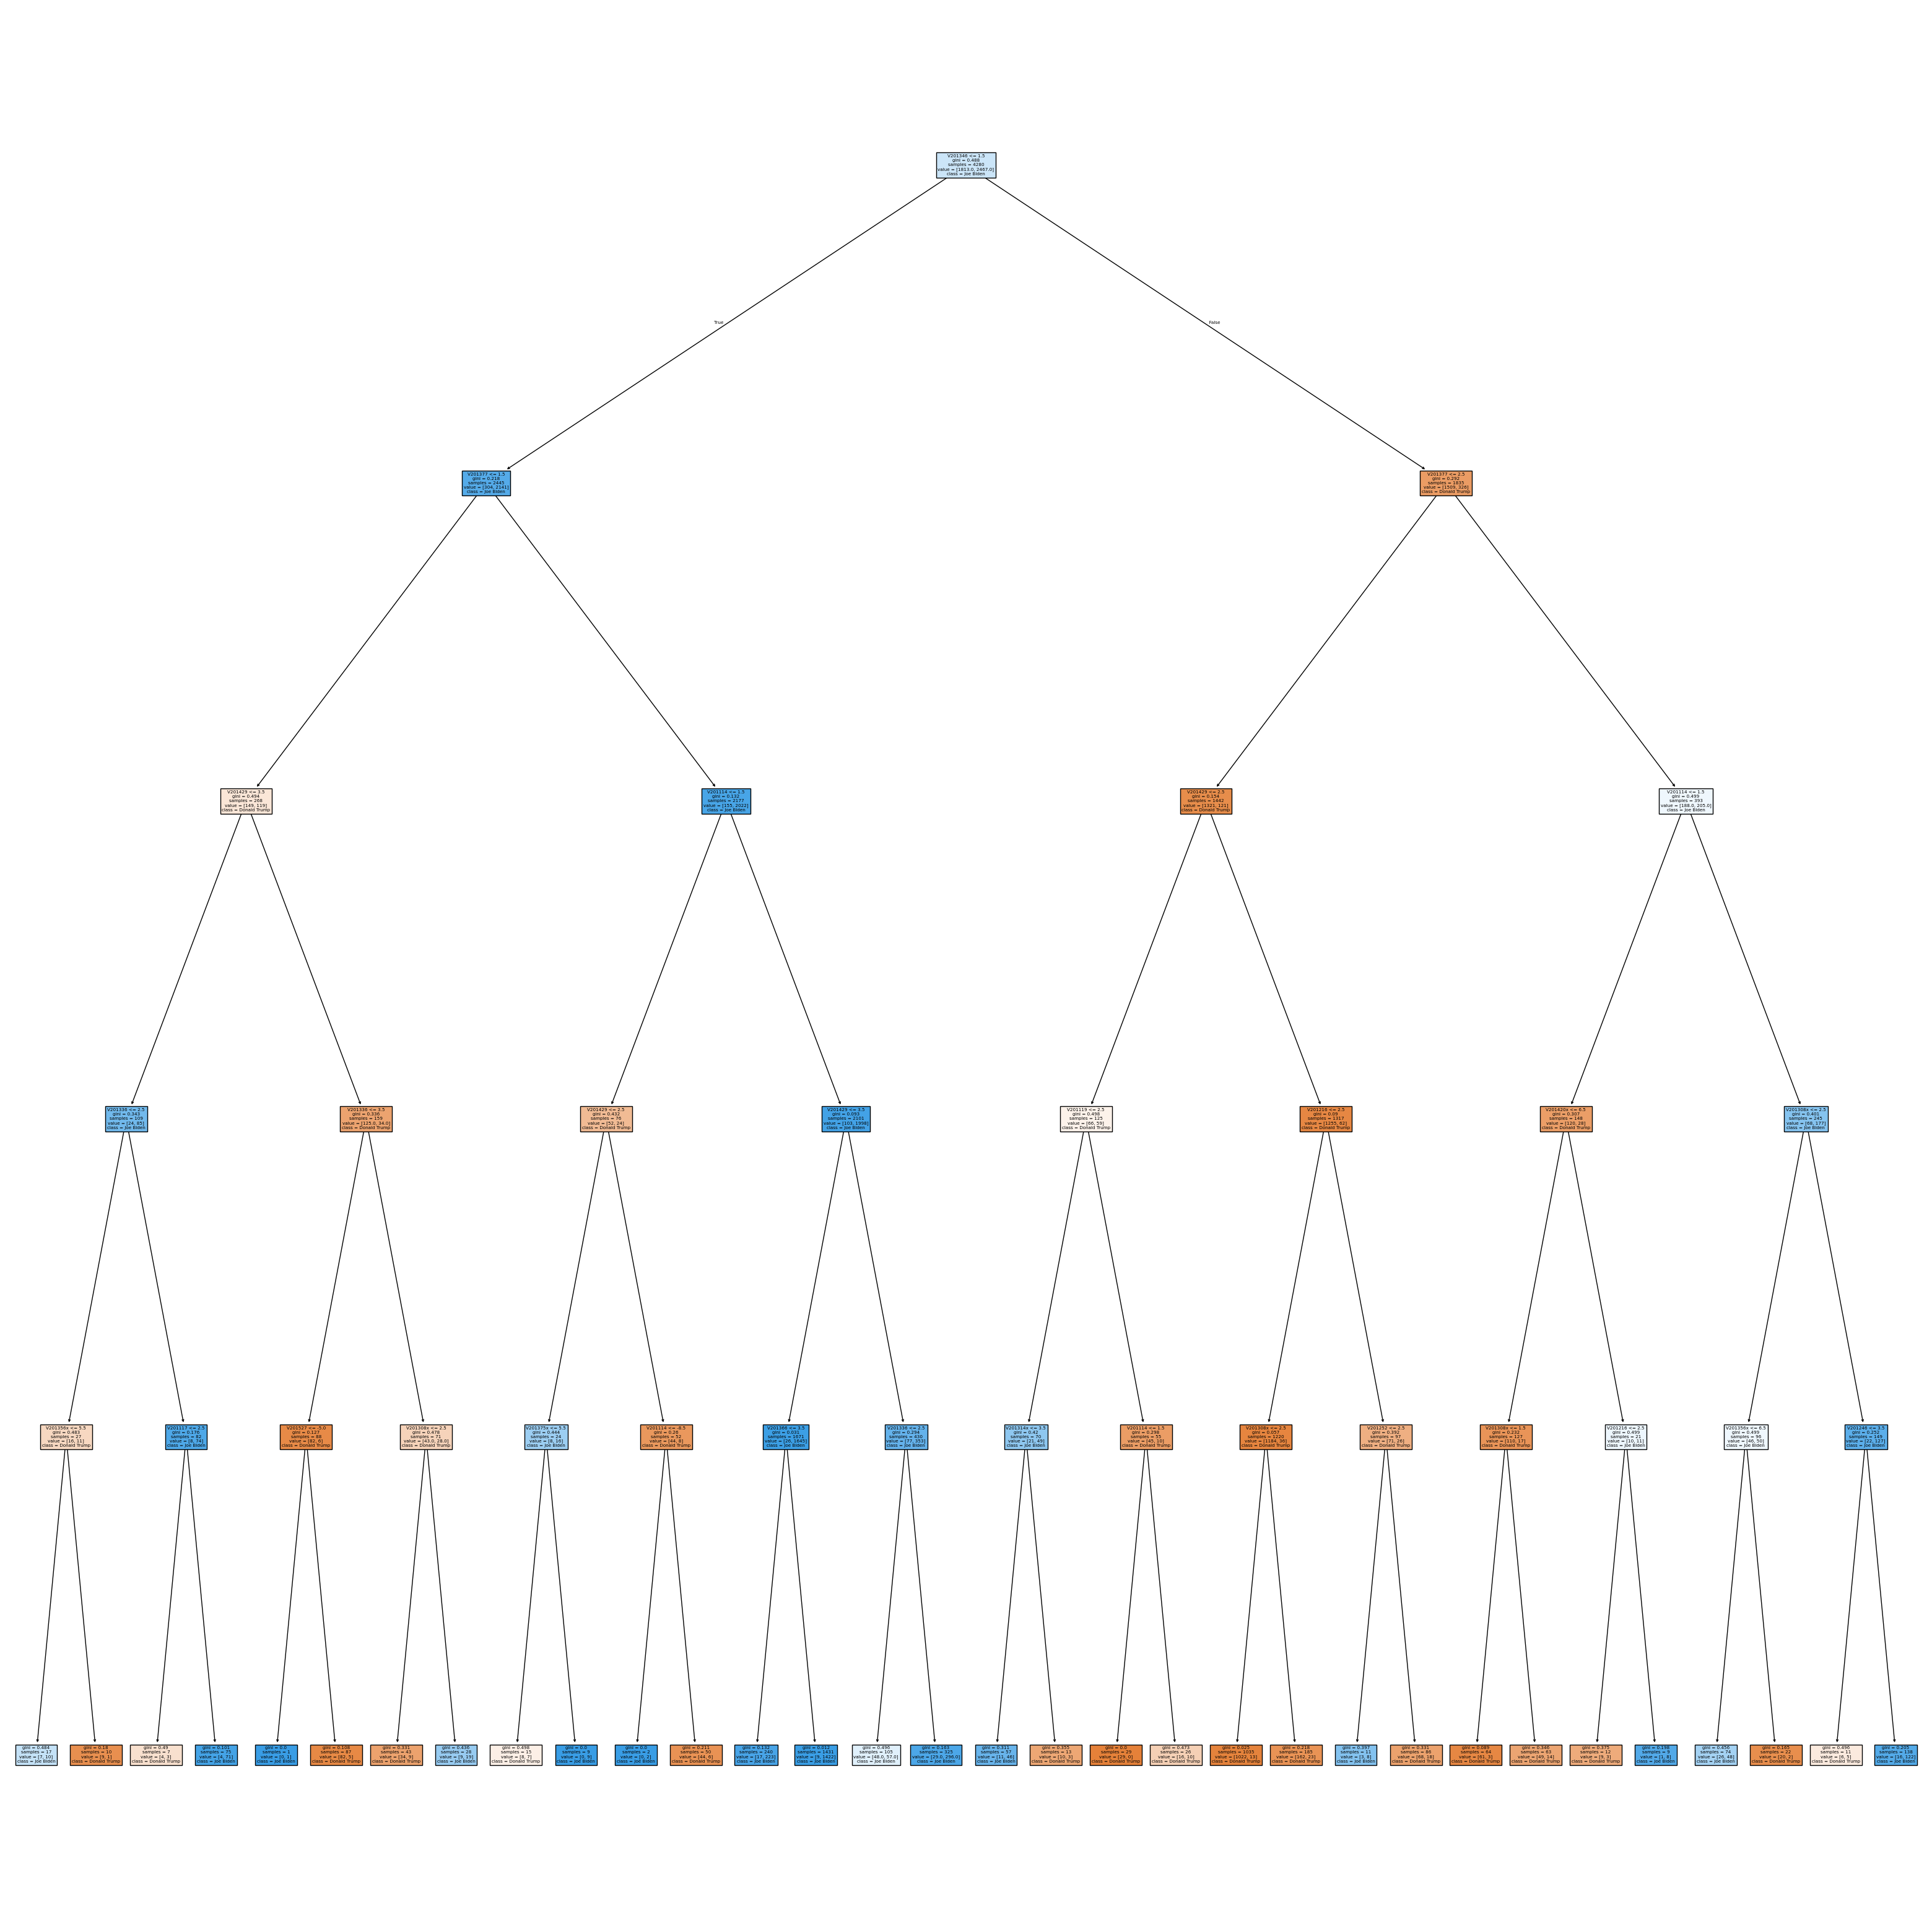

In [81]:
plt.figure(figsize=(40, 40))
_ = plot_tree(clf, filled=True, class_names=["Donald Trump", "Joe Biden"], feature_names=df.columns)
plt.savefig('./outputs/decision_tree_big.svg', bbox_inches="tight")

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       767
           1       0.94      0.94      0.94      1067

    accuracy                           0.93      1834
   macro avg       0.93      0.93      0.93      1834
weighted avg       0.93      0.93      0.93      1834



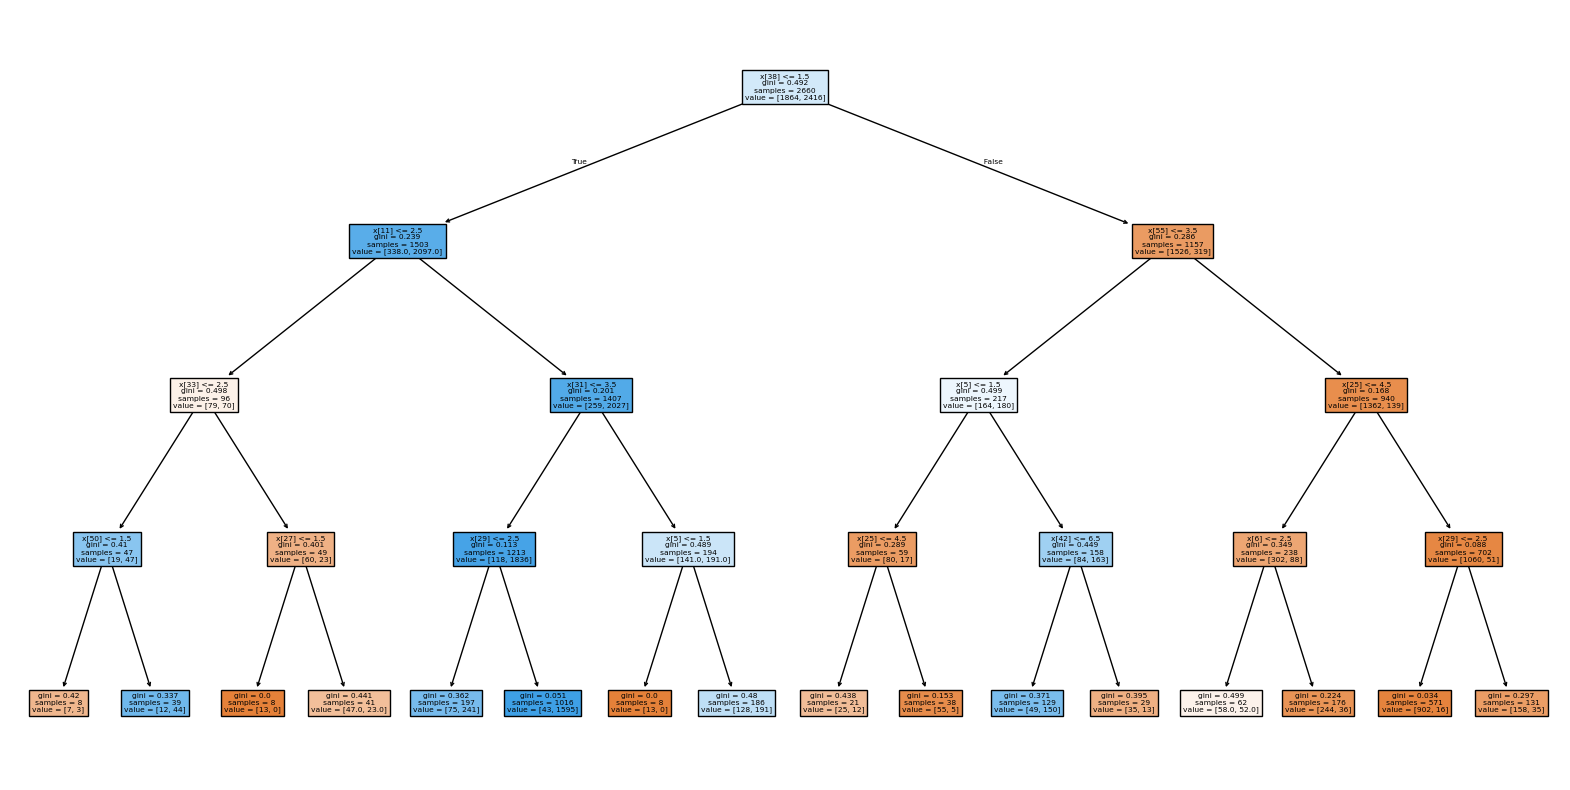

In [70]:
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)
plt.show()

# XGBoost

In [141]:
import xgboost as xgb

In [143]:
%%time
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=2)
xgb_model.fit(X_train, Y_train)

CPU times: user 1.74 s, sys: 3.07 ms, total: 1.75 s
Wall time: 94.3 ms


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
y_pred = xgb_model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       776
           1       0.94      0.95      0.95      1058

    accuracy                           0.94      1834
   macro avg       0.94      0.94      0.94      1834
weighted avg       0.94      0.94      0.94      1834



/home/lehoangchibach/anaconda3/envs/anes-evaluation/lib/python3.11/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


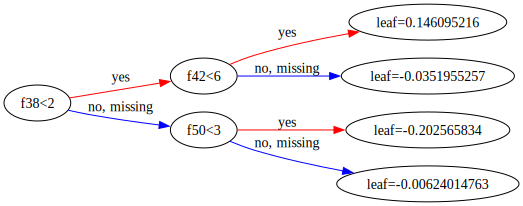

In [49]:
tree_graph = xgb.to_graphviz(xgb_model, num_trees=0, rankdir='LR')
tree_graph

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
%%time
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)

CPU times: user 0 ns, sys: 1.44 ms, total: 1.44 ms
Wall time: 4.27 ms


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [69]:
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       776
           1       0.87      0.94      0.91      1058

    accuracy                           0.89      1834
   macro avg       0.89      0.88      0.88      1834
weighted avg       0.89      0.89      0.89      1834



# Naive Bayes

In [70]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB

In [135]:
gnb = GaussianNB()

In [136]:
%%time
gnb.fit(X_train, Y_train)

CPU times: user 0 ns, sys: 3.73 ms, total: 3.73 ms
Wall time: 3.3 ms


,priors,None
,var_smoothing,1e-09


In [78]:
y_pred = gnb.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       776
           1       0.94      0.88      0.91      1058

    accuracy                           0.90      1834
   macro avg       0.90      0.90      0.90      1834
weighted avg       0.90      0.90      0.90      1834



# NN

In [124]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
Y_train_t = torch.tensor(Y_train, dtype=torch.long)
X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
Y_test_t = torch.tensor(Y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, Y_train_t), batch_size=64, shuffle=True)

In [128]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Dropout(p=0.2),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# Initialize model, loss, and optimizer
model = SimpleNN(input_dim=X_train.shape[1], hidden_dim=64, output_dim=len(set(Y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in tqdm(range(50)):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()


# Predict on test set
with torch.no_grad():
    model = model.to("cpu")
    preds = model(X_test_t).argmax(dim=1)

# Evaluate accuracy
acc = accuracy_score(Y_test, preds.numpy())
print(f"Test Accuracy: {acc:.4f}")

print(classification_report(Y_test, preds))

100%|███████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.39it/s]

Test Accuracy: 0.9095
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       740
           1       0.93      0.92      0.92      1094

    accuracy                           0.91      1834
   macro avg       0.90      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834



In [121]:
class ImprovedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),          # Regularization
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, output_dim)
        )
        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)  # Xavier initialization
                nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.net(x)

# ==== Initialize model, optimizer, loss ====
model = ImprovedNN(input_dim=X_train.shape[1], hidden_dim=128, output_dim=len(set(Y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

# Training loop
for epoch in tqdm(range(500)):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()



# Predict on test set
with torch.no_grad():
    model = model.to("cpu")
    preds = model(X_test_t).argmax(dim=1)

# Evaluate accuracy
acc = accuracy_score(Y_test, preds.numpy())
print(f"Test Accuracy: {acc:.4f}")

print(classification_report(Y_test, preds))

100%|█████████████████████████████████████████████████████████| 500/500 [00:36<00:00, 13.56it/s]

Test Accuracy: 0.9084
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       740
           1       0.93      0.92      0.92      1094

    accuracy                           0.91      1834
   macro avg       0.90      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834



In [131]:
class TransformerNN(nn.Module):
    def __init__(self, input_dim, num_classes, dim_model=128, nhead=4, num_layers=2):
        super().__init__()
        self.input_projection = nn.Linear(input_dim, dim_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_model, nhead=nhead, dim_feedforward=256, dropout=0.3)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Sequential(
            nn.LayerNorm(dim_model),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(dim_model, num_classes)
        )
        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        # Treat features as sequence length = 1
        x = self.input_projection(x).unsqueeze(1)  # [batch, seq_len=1, dim]
        x = self.transformer(x)                    # [batch, seq_len=1, dim]
        x = x.mean(dim=1)                          # pool
        return self.classifier(x)

model = TransformerNN(input_dim=X_train.shape[1], num_classes=len(set(Y_train))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

# Training loop
for epoch in tqdm(range(500)):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()



# Predict on test set
with torch.no_grad():
    model = model.to("cpu")
    preds = model(X_test_t).argmax(dim=1)

# Evaluate accuracy
acc = accuracy_score(Y_test, preds.numpy())
print(f"Test Accuracy: {acc:.4f}")

print(classification_report(Y_test, preds))

/home/lehoangchibach/anaconda3/envs/anes-evaluation/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
100%|█████████████████████████████████████████████████████████| 500/500 [02:55<00:00,  2.84it/s]


Test Accuracy: 0.9068
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       740
           1       0.94      0.90      0.92      1094

    accuracy                           0.91      1834
   macro avg       0.90      0.91      0.90      1834
weighted avg       0.91      0.91      0.91      1834

